<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/classification__learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_circles
sample_number=1000
x,y=make_circles(sample_number, 
                    noise=0.03, 
                    random_state=42)


In [ ]:
circle=pd.DataFrame({"x0":x[:, 0], "x1":x[:, 1], "label":y})
circle


,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


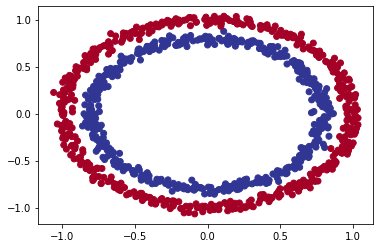

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);


In [ ]:
#check our features and labels shape
x.shape,y.shape

((1000, 2), (1000,))

In [ ]:
#creating model 
tf.random.set_seed(42)
model1=tf.keras.Sequential([
tf.keras.layers.Dense(1)                            
])

model1.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=["accuracy"])
model1.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 6s 4ms/step - loss: 0.7437 - accuracy: 0.4750
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.1855 - accuracy: 0.4960
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.1763 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.1740 - accuracy: 0.4920
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.1736 - accuracy: 0.5070


In [ ]:
# improving model
model1.fit(x,y,epochs=100)

In [ ]:
model1.evaluate(x,y)

32/32 [==============================] - 1s 4ms/step - loss: 0.1734 - accuracy: 0.5000


[0.17337140440940857, 0.5]

In [ ]:
# creating better model
tf.random.set_seed(42)
model2=tf.keras.Sequential([
tf.keras.layers.Dense(64)                            ,
tf.keras.layers.Dense(1)
])
model2.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=["accuracy"])
model2.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 9ms/step - loss: 0.5001 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.1741 - accuracy: 0.5050
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.1749 - accuracy: 0.4690
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.1741 - accuracy: 0.4940
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.1739 - accuracy: 0.5030
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1738 - accuracy: 0.5240
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1745 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1740 - accuracy: 0.5100
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1744 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1739 - accuracy: 0.4610
Epoch 11/

In [ ]:
model2.evaluate(x,y)
#still our model is terrible 


32/32 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.5000


[0.17455480992794037, 0.5]

In [ ]:
tf.random.set_seed(42)
model3=tf.keras.Sequential([
tf.keras.layers.Dense(100),
tf.keras.layers.Dense(10),
tf.keras.layers.Dense(1),
])
model3.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model3.fit(x,y,epochs=100)

In [ ]:
model3.evaluate(x,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.1751 - accuracy: 0.5040


[0.17511899769306183, 0.5040000081062317]

In [ ]:
# we need to visualize our data 
def plot_decision_boundary(model,x,y):
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


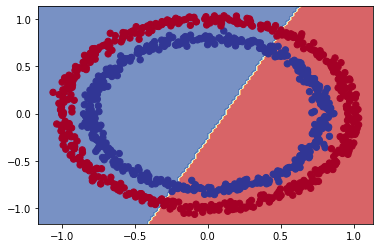

In [ ]:
plot_decision_boundary(model3,x,y)

In [ ]:
#checking our model with regression but to  change our loss function 
tf.random.set_seed(42)
x_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)
x_reg_train=x_regression[:150]
x_reg_test=x_regression[150:]
y_reg_train= y_regression[:150]
y_reg_test= y_regression[ 150:]
x_reg_test,y_reg_test


(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810,
        815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875,
        880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940,
        945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([ 850,  855,  860,  865,  870,  875,  880,  885,  890,  895,  900,
         905,  910,  915,  920,  925,  930,  935,  940,  945,  950,  955,
         960,  965,  970,  975,  980,  985,  990,  995, 1000, 1005, 1010,
        1015, 1020, 1025, 1030, 1035, 1040, 1045, 1050, 1055, 1060, 1065,
        1070, 1075, 1080, 1085, 1090, 1095], dtype=int32)>)

In [ ]:
tf.random.set_seed(42)
model3=tf.keras.Sequential([
tf.keras.layers.Dense(100),
tf.keras.layers.Dense(10),
tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])
model3.fit(tf.expand_dims(x_reg_train, axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 6ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 138.8992 - mae: 138.8992
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 53.1035 - mae: 53.1035
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 73.5183 - mae: 73.5183
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 47.0045 - mae: 47.0045
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 45.9375 - mae: 45.9375
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 42.3635 - mae: 42.3635
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 43.6835 - mae: 43.6835
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 42.6201 - mae: 42.6201
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 11ms/step - loss: 57.8962 - mae: 57.8962


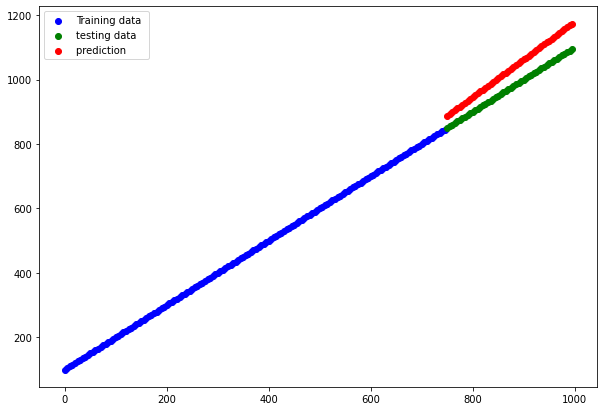

In [ ]:
model3.evaluate(x_reg_test,y_reg_test)
y_reg_pred=model3.predict(x_reg_test)
# plot model
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train,y_reg_train,c="b",label="Training data ")
plt.scatter(x_reg_test,y_reg_test,c="g",label="testing data ")
plt.scatter(x_reg_test,y_reg_pred,c="r",label="prediction ")
plt.legend()

In [ ]:
#recreating our model
tf.random.set_seed(42)
model4=tf.keras.Sequential([
tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)


  ])
model4.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=["accuracy"])
history=model4.fit(x,y,epochs=100)

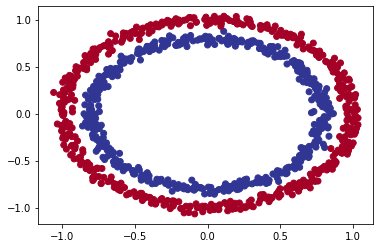

In [ ]:
plt.scatter(x [:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);


doing binary classifcation...


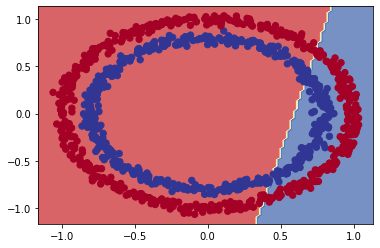

In [ ]:
plot_decision_boundary(model4,x=x,y=y)